<a href="https://colab.research.google.com/github/simodepth96/Data-Science-Portfolio/blob/main/Exploring_Defensive_Team_Performances_in_the_New_Champions_League_Format.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring **Defensive** Team Performances in the New Champions League Format (2025-EDA)

In this project, I explored the football performances of the teams involved in the new **Champions League** format throughout the **knockout stage**.  

This is an **Exploratory Data Analysis (EDA)** divided into two sections:  

1. **Defensive Data** – An exploratory analysis of the defensive performances of the teams. The study examines key variables such as tackles, interceptions, clean sheets, and more.  

2. **Offensive Data** – An exploratory analysis of the offensive performances of the teams. The study evaluates variables such as passes, possession, shooting, and attacking efficiency.  

## Purpose of the Analysis  

The aim of this analysis is to determine which teams demonstrated the best offensive and defensive performances throughout the **knockout stage**, helping them secure a strong position in the next phase of the tournament.  

The report will also attempt to **identify key factors** that contributed to teams either progressing or being eliminated from the competition.  

## Important Notes  

1. Due to the **descriptive** nature of the study, no assumptions of **causation or inference** will be made.  
2. This analysis may be subject to **judgemental errors** and potential **inaccuracies**. The motivations behind each EDA task may have been influenced by **confirmation bias, outcome bias, or heuristic thinking**.  
3. Please note that this is a **training project**, intended purely as a **data analysis exercise**.  

---
> Made by [![Follow](https://img.shields.io/twitter/follow/SimoneDePalma2?style=social)](https://www.linkedin.com/in/simodepth96/)
> Follow me [![Follow](https://img.shields.io/badge/LinkedIn-Follow-blue?style=social&logo=linkedin)](https://www.linkedin.com/in/simodepth96/)




##Methodology

The analysis has been conducted using a data-informed, disciplined approach, which can be summarized in the following bullet points:

1. **Data collection**. [fbref](https://fbref.com/) has been used as the data source. Datasets were scraped using either pandas or the traditional BeautifulSoup Python scraper.
2. **Data Profiling** - Inspection of data types, spread of values and missingness of the dataset
3. **Data Transformation** - Creating new variables and pre processing data so that an actionable dataset is ready to derive insights
4. **Univariate Analysis** - Once pre-processed, selected variables were described to identify potential patterns. This section includes a deep dive into central tendency measures.
5. **Bivariate Analysis** - In this section, relationships were detected to identify the potential influence of one variable on another.
6. **Data visualization** - Complementary to the above sections, data visualization tools were used throughout the notebook to continuously investigate relationships between categorical and numerical variables. The process included using catplots, heatmaps, pairplots, and scatterplots.

In [1]:
#@title Install and import libraries

!pip install plotly
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


# **Defensive Dataset**  

In this section, we will analyse key defensive indicators collected by Opta and made available by FBref, focusing on the knock-out stage of the new Champions League format.  

## **Methodology of the Analysis**  

1. **Data Sourcing** – Merged multiple datasets containing defensive indicators using an **INNER JOIN** in SQL.  

2. **Data Profiling** – The exploration process included:  
   - Identifying the data type of each variable.  
   - Examining how discrete/categorical data is coded and determining if any adjustments are necessary.  
   - Assessing how the data is scaled.  
   - Detecting missing data and understanding how it is recorded.  

3. **Data Transformation** – Created new variables based on dataset predictors and performed extensive pre-processing to prepare the data for further analysis.  

4. **Data Visualisation** – Explored potential relationships between categorical and numerical variables using **catplots** and **scatterplots**.  

##Data Profiling

In [52]:
# Import the dataset
defensive = pd.read_excel('/content/CL - Defensive Dataset.xlsx')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

defensive.head()

,Squad,Tackles,Tackles Won,Lost,Recovered,Blocks,Shots Blocked,Passes Blocked,Interceptions,Yellow Card,Red Card,Fouls Committed,Offsides,Interceptions.1,Tackles Won.1,Possession %,Touches,Touches in defensive penalty area,Touches in defensive 1/3,Touches in middle 1/3
0,eng Arsenal,135,79,48,300,77,14,63,58,12,0,88,13,58,79,53.1,4963,370,1269,2192
1,eng Aston Villa,107,60,64,327,76,23,53,61,17,0,83,12,61,60,51.3,4639,476,1512,2078
2,it Atalanta,106,61,71,389,69,15,54,64,13,0,84,22,64,61,52.8,5101,378,1301,2153
3,es Atlético Madrid,141,81,68,373,88,18,70,79,14,1,78,11,79,81,48.5,5287,405,1538,2406
4,es Barcelona,126,80,68,326,84,18,66,49,9,1,80,5,49,80,61.5,5792,449,1442,2950


### Data types
The quantitative variables should be read in as numbers — either int64 or float64 — and categorical variables should be stored as strings (columns of strings have a dtype of object because of how they are stored in Python).


In [3]:
defensive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Squad                              36 non-null     object 
 1   Tackles                            36 non-null     int64  
 2   Tackles Won                        36 non-null     int64  
 3   Lost                               36 non-null     int64  
 4   Recovered                          36 non-null     int64  
 5   Blocks                             36 non-null     int64  
 6   Shots Blocked                      36 non-null     int64  
 7   Passes Blocked                     36 non-null     int64  
 8   Interceptions                      36 non-null     int64  
 9   Yellow Card                        36 non-null     int64  
 10  Red Card                           36 non-null     int64  
 11  Fouls Committed                    36 non-null     int64  
 

> Possession % is a `float` and Squad is an `object`.

We'll change them later into `int` and `string` respectively in order to normalize the dataset

### Data Profiling - Numerical and Categorical Variable

In [5]:
#Categorical Encoding - Squad
print(defensive['Squad'].nunique())
defensive['Squad'].value_counts()

36


,count
Squad,
eng Arsenal,1
eng Aston Villa,1
eng Manchester City,1
it Milan,1
fr Monaco,1
fr Paris S-G,1
nl PSV Eindhoven,1
de RB Leipzig,1
at RB Salzburg,1


In [7]:
#Numerical Encoding - Stats
defensive.describe().T

,count,mean,std,min,25%,50%,75%,max
Tackles,36.0,135.527778,21.368182,90.0,123.50,135.5,149.00,181.0
Tackles Won,36.0,81.555556,13.211347,51.0,73.25,81.0,91.50,105.0
Lost,36.0,68.444444,12.566269,41.0,61.00,66.5,77.25,95.0
Recovered,36.0,337.944444,31.749866,294.0,314.75,329.5,354.50,419.0
Blocks,36.0,87.305556,13.796106,60.0,79.25,88.0,97.25,111.0
Shots Blocked,36.0,26.055556,9.220922,12.0,18.75,25.5,29.25,49.0
Passes Blocked,36.0,61.250000,10.254964,40.0,54.00,62.5,67.00,86.0
Interceptions,36.0,72.361111,13.469866,42.0,61.00,72.5,80.00,98.0
Yellow Card,36.0,15.972222,4.705535,9.0,13.00,15.0,18.25,28.0
Red Card,36.0,0.611111,0.644882,0.0,0.00,1.0,1.00,2.0


##Missing Data

When we initially inspected the data, we saw some evidence of missing data

The observations with missing values will either have to be removed or replaced

In [8]:
defensive.isna().sum()

,0
Squad,0
Tackles,0
Tackles Won,0
Lost,0
Recovered,0
Blocks,0
Shots Blocked,0
Passes Blocked,0
Interceptions,0
Yellow Card,0


In [9]:
#@title Calculate the Percentage of Missing Data
maxRows = defensive['Squad'].count() #this is the first header in the index

print('% Missing Data:')
print((1 - defensive.count() / maxRows) * 100)

% Missing Data:
Squad                                0.0
Tackles                              0.0
Tackles Won                          0.0
Lost                                 0.0
Recovered                            0.0
Blocks                               0.0
Shots Blocked                        0.0
Passes Blocked                       0.0
Interceptions                        0.0
Yellow Card                          0.0
Red Card                             0.0
Fouls Committed                      0.0
Offsides                             0.0
Interceptions.1                      0.0
Tackles Won.1                        0.0
Possession %                         0.0
Touches                              0.0
Touches in defensive penalty area    0.0
Touches in defensive 1/3             0.0
Touches in middle 1/3                0.0
dtype: float64


##Data Transformation

Alias feature engineering, this process is about adding up new predictors by manipulating variables in the dataset


In [53]:
defensive['Tackles lost'] = defensive['Tackles'] - defensive['Tackles Won']
defensive.drop(['Tackles','Lost','Interceptions.1',	'Tackles Won.1','Offsides'], axis=1, inplace=True)
defensive.head()

,Squad,Tackles Won,Recovered,Blocks,Shots Blocked,Passes Blocked,Interceptions,Yellow Card,Red Card,Fouls Committed,Possession %,Touches,Touches in defensive penalty area,Touches in defensive 1/3,Touches in middle 1/3,Tackles lost
0,eng Arsenal,79,300,77,14,63,58,12,0,88,53.1,4963,370,1269,2192,56
1,eng Aston Villa,60,327,76,23,53,61,17,0,83,51.3,4639,476,1512,2078,47
2,it Atalanta,61,389,69,15,54,64,13,0,84,52.8,5101,378,1301,2153,45
3,es Atlético Madrid,81,373,88,18,70,79,14,1,78,48.5,5287,405,1538,2406,60
4,es Barcelona,80,326,84,18,66,49,9,1,80,61.5,5792,449,1442,2950,46


In [54]:
#@title Data Pre-Processing

defensive['Squad'] = defensive['Squad'].astype(str)
defensive['Possession %'] = defensive['Possession %'].astype(int)

#replace eng with no values in Squad
defensive['Squad'] = defensive['Squad'].str.replace('eng', '')
defensive['Squad'] = defensive['Squad'].str.replace('es ', '')
defensive['Squad'] = defensive['Squad'].str.replace('it ', '')
defensive['Squad'] = defensive['Squad'].str.replace('de ', '')
defensive['Squad'] = defensive['Squad'].str.replace('fr ', '')
defensive['Squad'] = defensive['Squad'].str.replace('nl', '')
defensive['Squad'] = defensive['Squad'].str.replace('pt', '')
defensive['Squad'] = defensive['Squad'].str.replace('sct', '')
defensive['Squad'] = defensive['Squad'].str.replace('be', '')
defensive['Squad'] = defensive['Squad'].str.replace('hr ', '')
defensive['Squad'] = defensive['Squad'].str.replace('at ', '')
defensive['Squad'] = defensive['Squad'].str.replace('rs ', '')
defensive['Squad'] = defensive['Squad'].str.replace('ua', '')
defensive['Squad'] = defensive['Squad'].str.replace('cz', '')
defensive['Squad'] = defensive['Squad'].str.replace('sk', '')
defensive['Squad'] = defensive['Squad'].str.replace('ch ', '')

#lowercase all column names
defensive.columns = map(str.lower, defensive.columns)

defensive.head()

,squad,tackles won,recovered,blocks,shots blocked,passes blocked,interceptions,yellow card,red card,fouls committed,possession %,touches,touches in defensive penalty area,touches in defensive 1/3,touches in middle 1/3,tackles lost
0,Arsenal,79,300,77,14,63,58,12,0,88,53,4963,370,1269,2192,56
1,Aston Villa,60,327,76,23,53,61,17,0,83,51,4639,476,1512,2078,47
2,Atalanta,61,389,69,15,54,64,13,0,84,52,5101,378,1301,2153,45
3,Atlético Madrid,81,373,88,18,70,79,14,1,78,48,5287,405,1538,2406,60
4,Barcelona,80,326,84,18,66,49,9,1,80,61,5792,449,1442,2950,46


#Univariate Analysis

After describing the dataset in its entirety, now it's time to **describe variables**

We can check the spread of values using boxplots and get a sense of the distribution using histograms


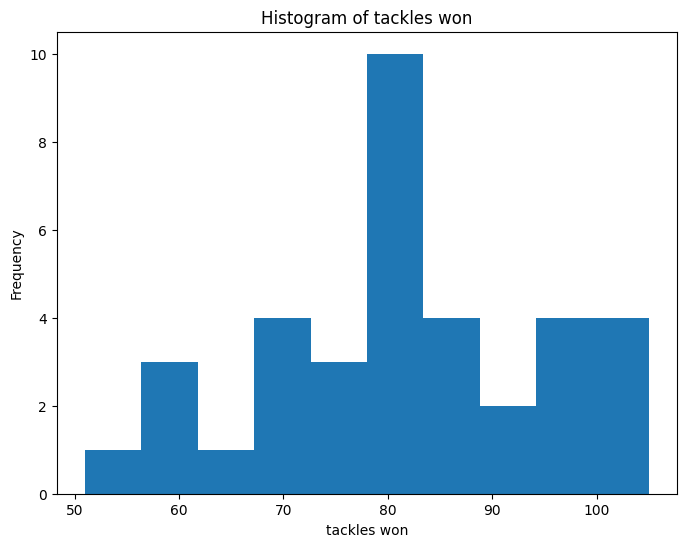

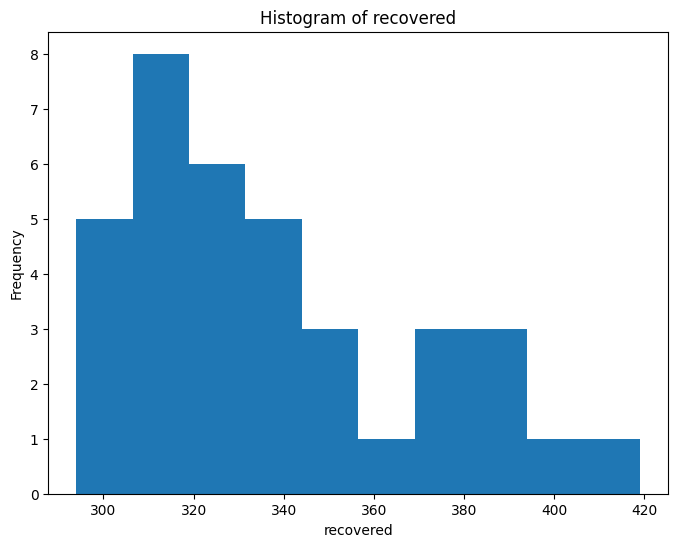

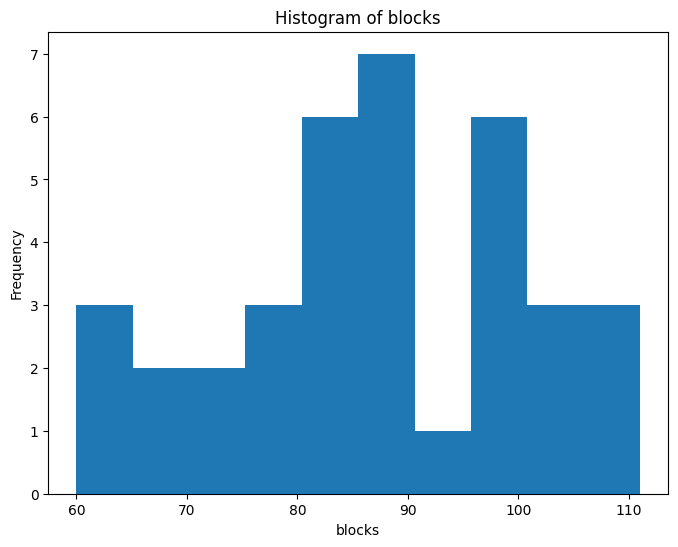

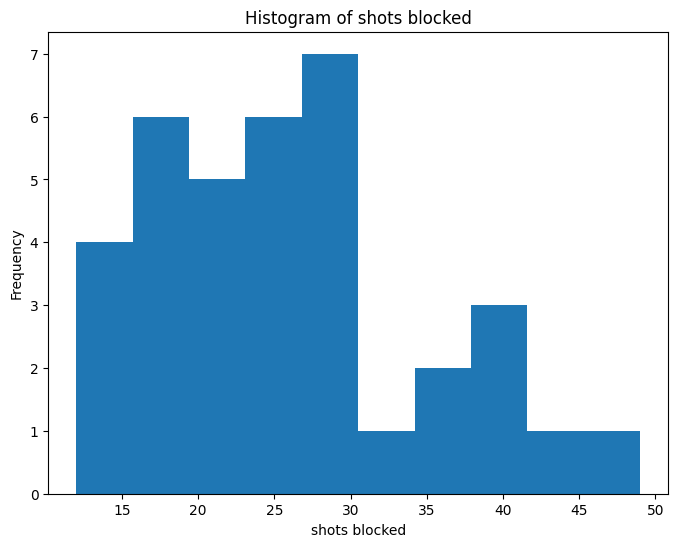

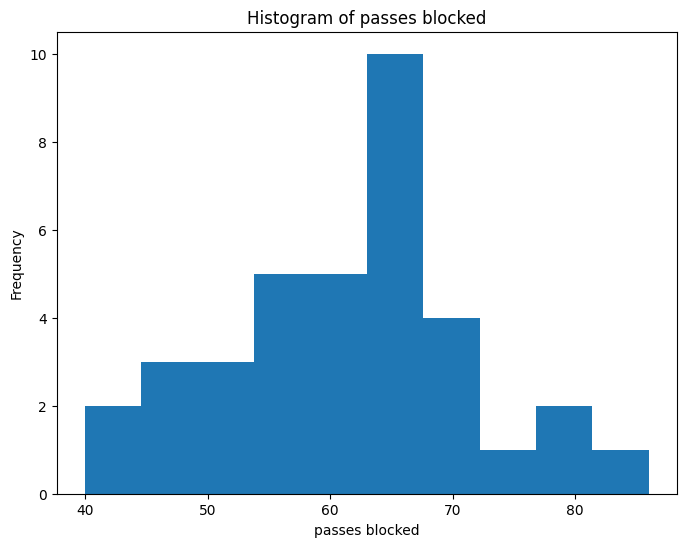

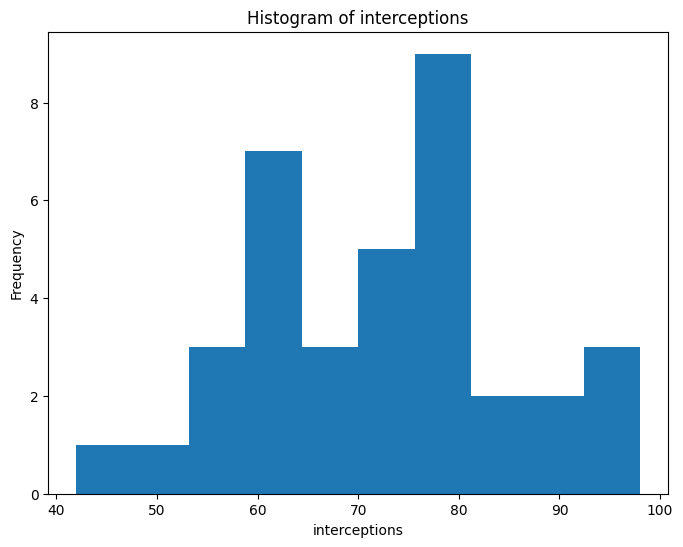

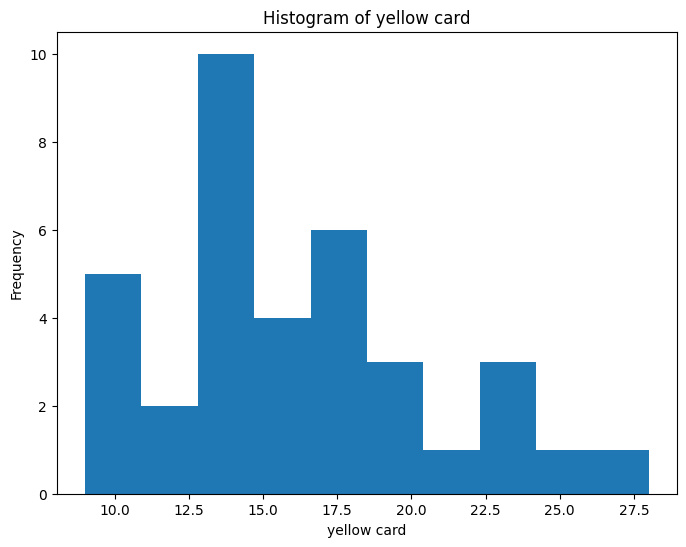

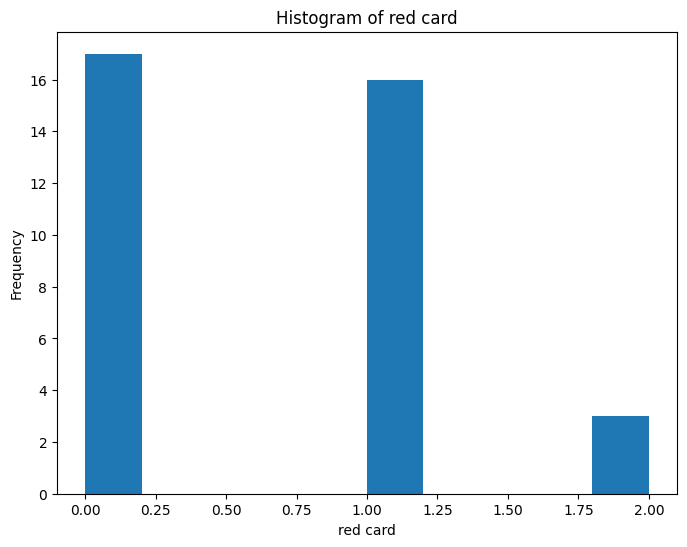

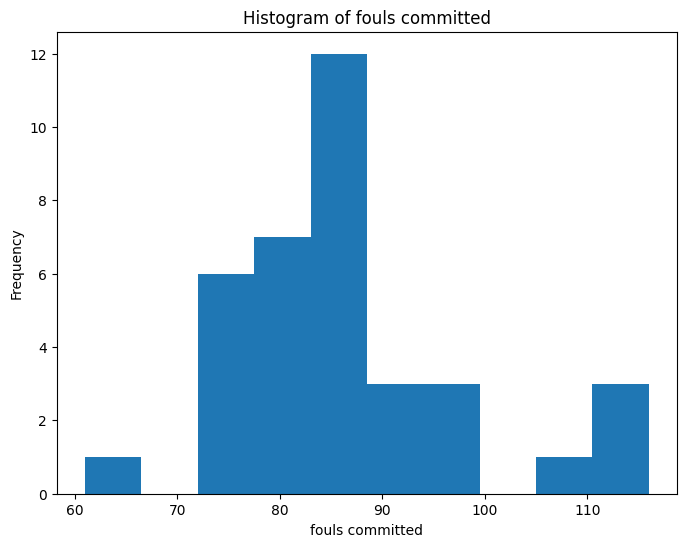

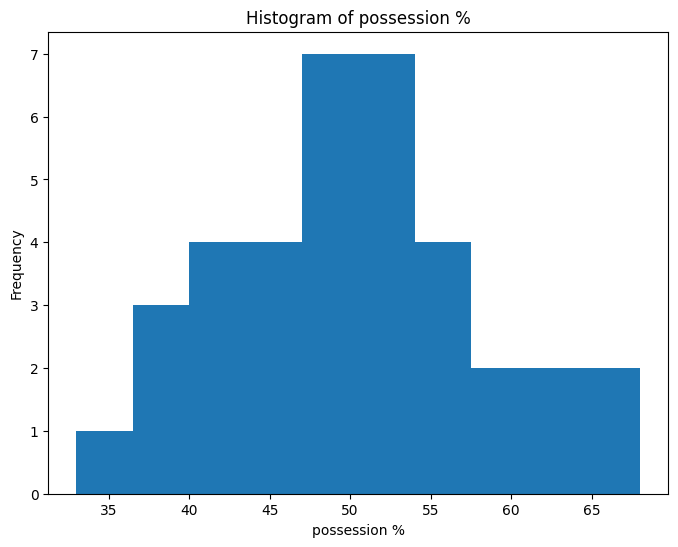

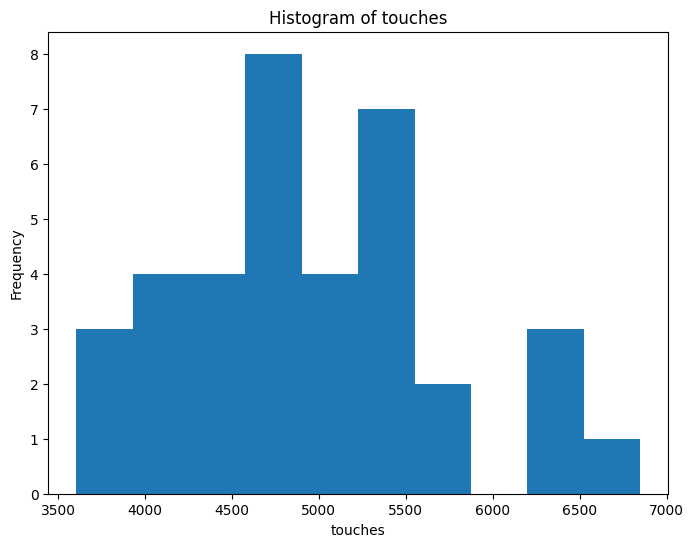

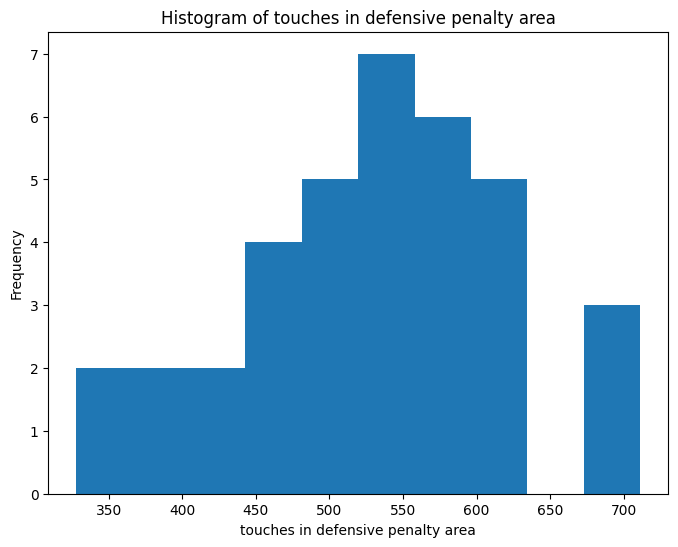

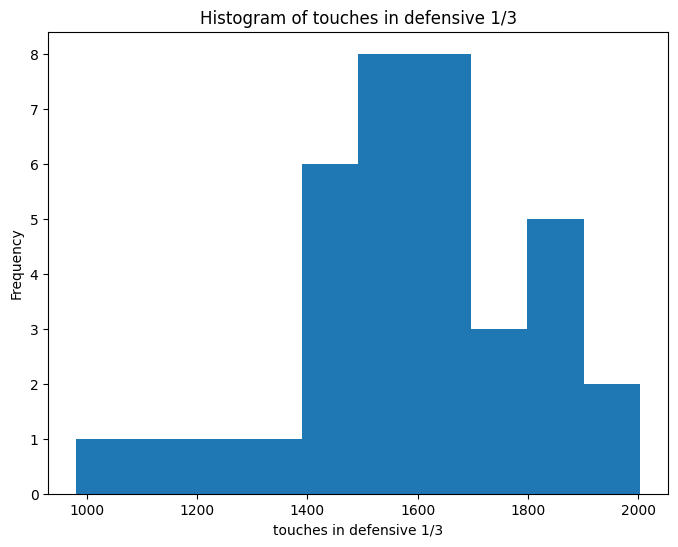

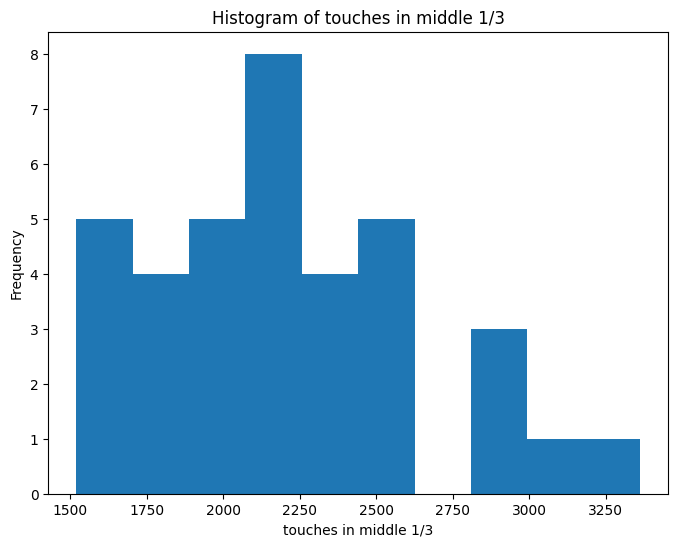

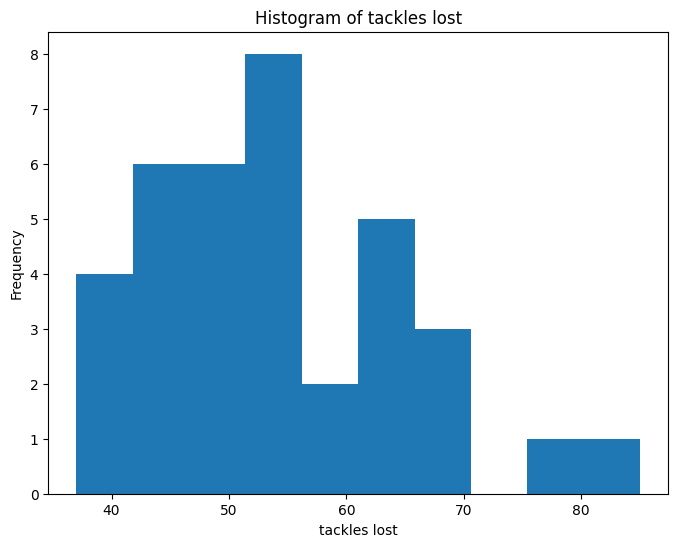

In [ ]:
#@title Univariate Analysis on Numerical Variables

import numpy as np
import matplotlib.pyplot as plt

numerical_cols = defensive.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(defensive[col], bins=10)  # Adjust number of bins as needed
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

In [18]:
#@title What teams lose more tackles in the knock-out stage?
fig = px.bar(
    defensive.sort_values(by='tackles lost', ascending=False),
    x='squad',
    y='tackles lost',
    title='What teams lose more tackles?',
    color='tackles lost',  # Color based on mentions
    hover_name='squad'
)

# Rotate x-axis labels
fig.update_layout(
    xaxis_tickangle=-45  # Rotate labels 45 degrees counterclockwise
)

# Show plot
fig.show()


In [19]:
#@title What teams won more tackles?
fig = px.bar(
    defensive.sort_values(by='tackles won', ascending=False),
    x='squad',
    y='tackles won',
    title=' What teams did win more tackles?',
    color='tackles won',  # Color based on mentions
    hover_name='squad'
)

# Rotate x-axis labels
fig.update_layout(
    xaxis_tickangle=-45  # Rotate labels 45 degrees counterclockwise
)

# Show plot
fig.show()

In [20]:
#@title What teams recovered most ball possessions %?
fig = px.bar(
    defensive.sort_values(by='recovered', ascending=False),
    x='squad',
    y='recovered',
    title='What teams recovered most possessions––?',
    color='recovered',  # Color based on mentions
    hover_name='squad'
)

# Rotate x-axis labels
fig.update_layout(
    xaxis_tickangle=-45  # Rotate labels 45 degrees counterclockwise
)

# Show plot
fig.show()

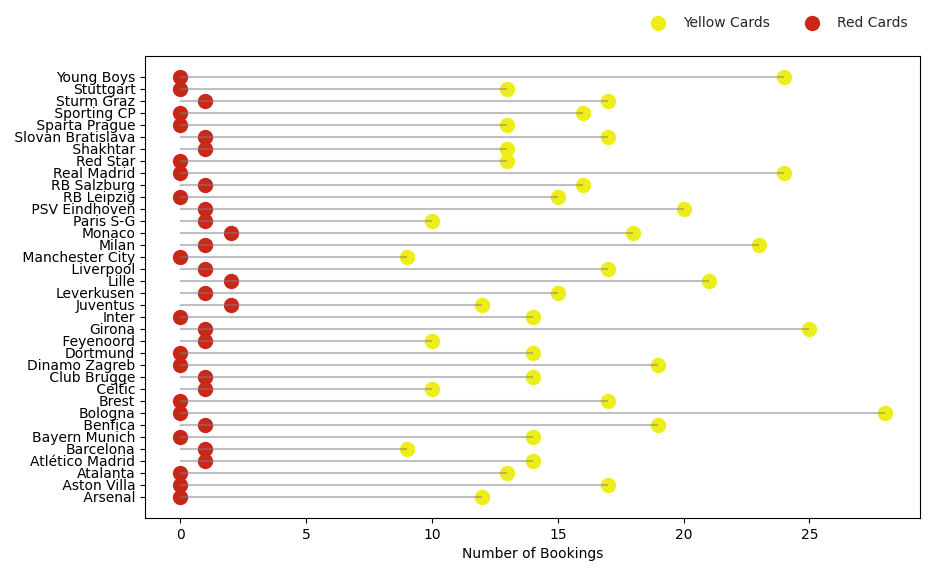

In [ ]:
#@title Yellow Cards vs Red Cards
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Create the lollipop chart
ax.hlines(y=defensive["squad"], xmin=0, xmax=defensive["yellow card"], color='gray', alpha=0.5)
ax.scatter(defensive["yellow card"], defensive["squad"], color='#eded18', label='Yellow Cards', s=100)
ax.scatter(defensive["red card"], defensive["squad"], color='#c92718', label='Red Cards', s=100)

# Add labels
ax.set_xlabel("Number of Bookings")

# Apply Seaborn style for the grid
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Enable gridlines
#ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Show the legend
ax.legend()
plt.legend(ncol=2, bbox_to_anchor=(1, 1.03), loc="lower right", frameon=False)

# Show the plot
plt.show()

# **Bivariate Analysis**  

Bivariate analysis helps identify interesting relationships between variables and how one influences the other.  

To begin, we need to examine potential relationships between the features. This involves performing a **correlation analysis** and visualising the results with a **heatmap** that displays correlation values.  

A heatmap is useful for detecting **non-linear associations** between predictors and the outcome variable, as well as identifying potential **collinearity**.  

By evaluating these relationships, we can uncover misleading patterns caused by spurious connections or gain valuable insights from meaningful correlations.  



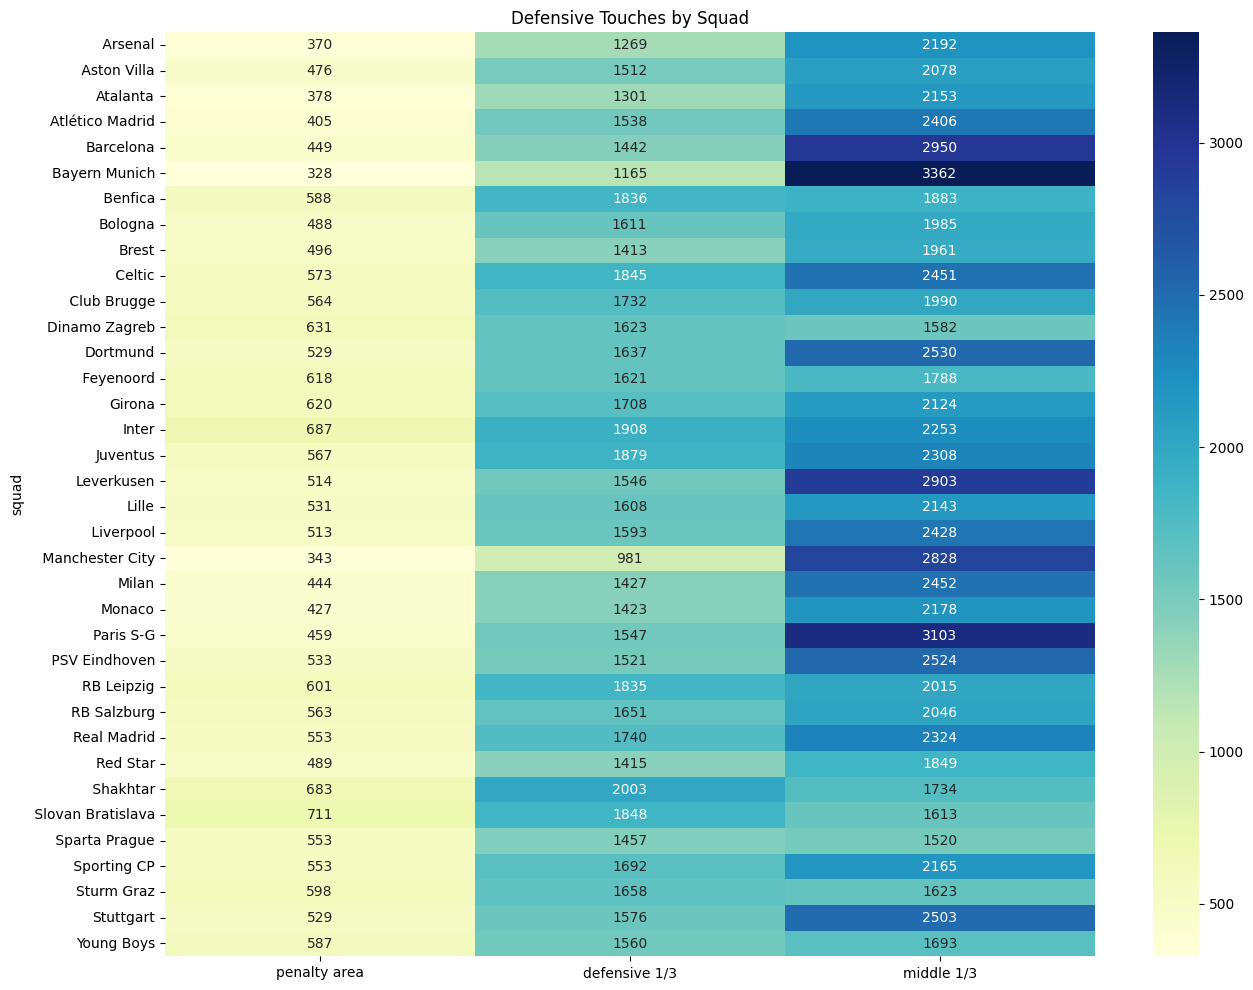

In [24]:
#@title Defensive Touches by Team
touches = defensive.copy()
# Select specific columns using a list of column names
touches = touches[['squad','touches in defensive penalty area', 'touches in defensive 1/3', 'touches in middle 1/3']]

# Set 'squad' as the index to display squad names on the y-axis
touches_indexed = touches.set_index('squad')

touches_indexed = touches_indexed.rename(
    columns={
        'touches in defensive penalty area':'penalty area',
        'touches in defensive 1/3': 'defensive 1/3',
        'touches in middle 1/3':'middle 1/3'
    }
)

# Create a figure with an appropriate size
plt.figure(figsize=(15, 12))

# Generate the heatmap with annotations
sns.heatmap(touches_indexed, annot=True, fmt="g", cmap="YlGnBu")

# Set the title of the heatmap
plt.title("Defensive Touches by Squad")

# Display the plot
plt.show()

##Correlation Analysis

The analysis has leveraged **Spearman's coefficient** to enforce protection against outliers and non-normal feature distributions.

In [55]:
import plotly.express as px
from scipy.stats import spearmanr

In [47]:
#drop redundant predictors
#this is to avoid multicollinearity and therefore reducing spuriousness in the variable correlations

defensive.drop(['squad','touches','blocks'], axis=1, inplace=True)

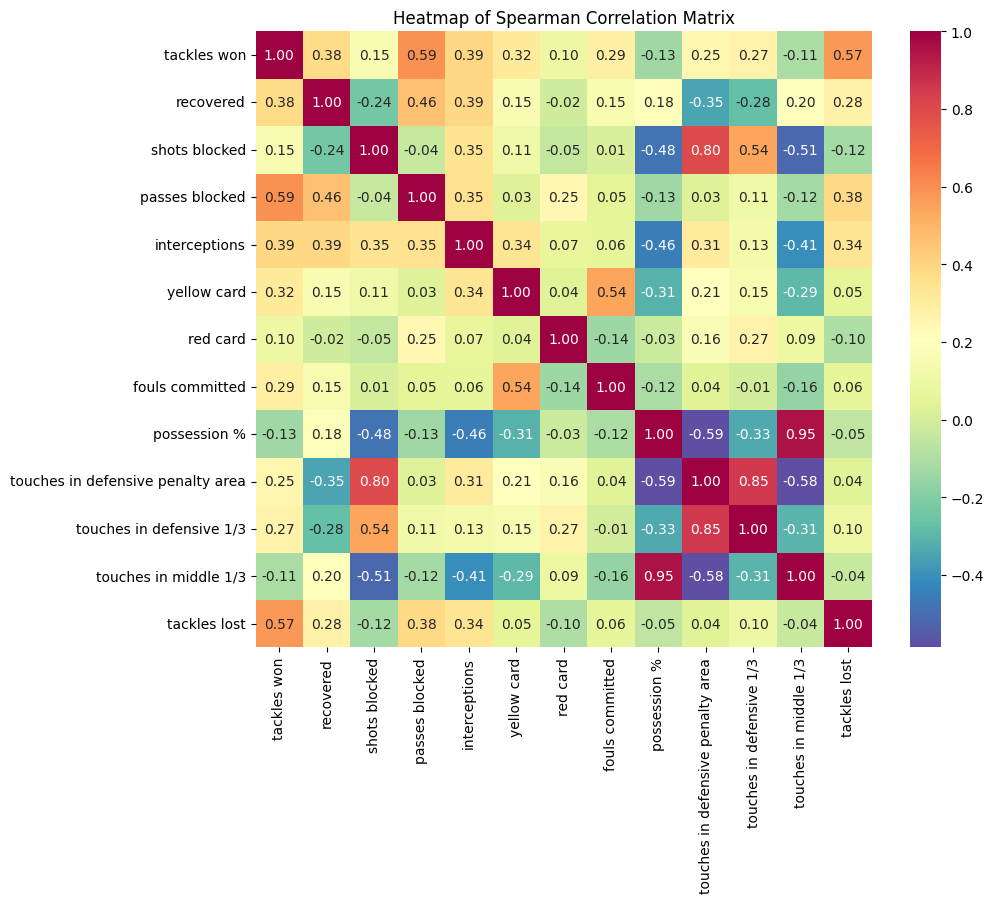

In [48]:
#@title Heatmap with spearman's coefficient

# Compute the Spearman's rank correlation matrix
corrmat = defensive.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
hm = sns.heatmap(corrmat,
                 cbar=True,
                 square=True,
                 fmt='.2f',
                 annot=True,  # to display the correlation values
                 annot_kws={'size': 10},
                 yticklabels=corrmat.columns,
                 xticklabels=corrmat.columns,
                 cmap="Spectral_r")

# Show the plot
plt.title('Heatmap of Spearman Correlation Matrix')
plt.show()

## Information Gains from Top Correlated Features

In [92]:
#@title Teams Ratio lost vs won tackles
correlation, p_value = spearmanr(defensive['tackles won'], defensive['tackles lost'])

# Calculate median values to create quadrants
median_tackles = defensive['tackles won'].median()
median_tackles_lost = defensive['tackles lost'].median()

# Create scatter plot
fig = px.scatter(defensive,
                 x='tackles won',
                 y='tackles lost',
                 color='squad',
                 size_max=100,
                 title=f"Tackles Won vs. Tackles lost (Spearman's ρ = {correlation:.2f})",
                 width=1200,
                 height=800,
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Add vertical and horizontal lines for quadrants
fig.add_shape(
    type="line",
    x0=median_tackles, x1=median_tackles,
    y0=defensive['tackles lost'].min(), y1=defensive['tackles lost'].max(),
    line=dict(color="black", width=2, dash="dash")
)

fig.add_shape(
    type="line",
    x0=defensive['tackles won'].min(), x1=defensive['tackles won'].max(),
    y0=median_tackles_lost, y1=median_tackles_lost,
    line=dict(color="black", width=2, dash="dash")
)

# Add quadrant labels
fig.add_annotation(x=median_tackles * 1.4, y=median_tackles_lost * 1.4,
                   text="High Tackles Won & High Tackles Lost", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_tackles * 0.8, y=median_tackles_lost * 1.4,
                   text="Low Tackles Won & High Tackles Lost", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_tackles * 1.4, y=median_tackles_lost * 0.8,
                   text="High Tackles Won & Low Tackles Lost", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_tackles * 0.8, y=median_tackles_lost * 0.8,
                   text="Low Tackles Won & Low Tackles Lost", showarrow=False, font=dict(size=12, color="black"))

# Add annotation for source
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,
    showarrow=False,
    font=dict(size=12)
)

fig.show()


Tackles are great defensive assets to combat opponents.

**Juventus, Sturm Graz and RB Leizpig** won most tackles than they lost

##Information Gains on Top Correlated Features

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import spearmanr

In [86]:
#@title  Teams Successful Tackles and Passes Blocked
correlation, p_value = spearmanr(defensive['tackles won'], defensive['passes blocked'])

# Calculate median values to create quadrants
median_tackles = defensive['tackles won'].median()
median_passes_blocked = defensive['passes blocked'].median()

# Create scatter plot
fig = px.scatter(defensive,
                 x='tackles won',
                 y='passes blocked',
                 color='squad',
                 size_max=100,
                 title=f"Teams Successful Tackles and Passes Blocked (Spearman's ρ = {correlation:.2f})",
                 width=1200,
                 height=800,
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Add vertical and horizontal lines for quadrants
fig.add_shape(
    type="line",
    x0=median_tackles, x1=median_tackles,
    y0=defensive['passes blocked'].min(), y1=defensive['passes blocked'].max(),
    line=dict(color="black", width=2, dash="dash")
)

fig.add_shape(
    type="line",
    x0=defensive['tackles won'].min(), x1=defensive['tackles won'].max(),
    y0=median_passes_blocked, y1=median_passes_blocked,
    line=dict(color="black", width=2, dash="dash")
)

# Add quadrant labels
fig.add_annotation(x=median_tackles * 1.3, y=median_passes_blocked * 1.3,
                   text="High Tackles & High Blocks", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_tackles * 0.8, y=median_passes_blocked * 1.3,
                   text="Low Tackles & High Blocks", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_tackles * 1.3, y=median_passes_blocked * 0.8,
                   text="High Tackles & Low Blocks", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_tackles * 0.8, y=median_passes_blocked * 0.8,
                   text="Low Tackles & Low Blocks", showarrow=False, font=dict(size=12, color="black"))

# Add annotation for source
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,
    showarrow=False,
    font=dict(size=12)
)

fig.show()


Tackles may contribute to blocking pass lines.

**PSV Eindhoven** tackled opponents massively but that didn't translate in blocking passes

**Salzburg** and **Benfica** were able to dovetail the tackle ability with blocking passes

In [76]:
#@title Teams Bookings and fouls committed

# Calculate Spearman correlation
correlation, p_value = spearmanr(defensive['yellow card'], defensive['fouls committed'])

# Calculate median values to create quadrants
median_yellow = defensive['yellow card'].median()
median_foul = defensive['fouls committed'].median()

# Create scatter plot
fig = px.scatter(defensive,
                 x='yellow card',
                 y='fouls committed',
                 color='squad',
                 size_max=100,
                 title=f"Teams Bookings and fouls committed (Spearman's ρ = {correlation:.2f})",
                 width=1200,
                 height=800,
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Add vertical and horizontal lines for quadrants
fig.add_shape(
    type="line",
    x0=median_yellow, x1=median_yellow,
    y0=defensive['fouls committed'].min(), y1=defensive['fouls committed'].max(),
    line=dict(color="black", width=2, dash="dash")
)

fig.add_shape(
    type="line",
    x0=defensive['yellow card'].min(), x1=defensive['yellow card'].max(),
    y0=median_foul, y1=median_foul,
    line=dict(color="black", width=2, dash="dash")
)

# Add quadrant labels
fig.add_annotation(x=median_yellow * 1.4, y=median_foul * 1.4,
                   text="High Yellows & High Fouls", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_yellow * 0.8, y=median_foul * 1.4,
                   text="Low Yellows & High Fouls", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_yellow * 1.4, y=median_foul * 0.8,
                   text="High Yellows & Low High Fouls", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_yellow * 0.8, y=median_foul * 0.8,
                   text="Low Yellows & Low High Fouls", showarrow=False, font=dict(size=12, color="black"))

# Add annotation for source
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,
    showarrow=False,
    font=dict(size=12)
)

fig.show()




Infractions on the pitch may lead the referee waving yellow cards

**Bologna**, **Girona** and **Young Boys** were the roughest and yet the naughtiest teams in the knock out stage


In [84]:
#@title Teams Possession in Defensive Penalty Area

# Calculate Spearman correlation
correlation, p_value = spearmanr(defensive['possession %'], defensive['touches in defensive penalty area'])

# Calculate median values to create quadrants
median_poss = defensive['possession %'].median()
median_pen = defensive['touches in defensive penalty area'].median()

# Create scatter plot
fig = px.scatter(defensive,
                 x='possession %',
                 y='touches in defensive penalty area',
                 color='squad',
                 size_max=100,
                 title=f"Teams Possession in Defensive Penalty Area (Spearman's ρ = {correlation:.2f})",
                 width=1200,
                 height=800,
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Add vertical and horizontal lines for quadrants
fig.add_shape(
    type="line",
    x0=median_poss, x1=median_poss,
    y0=defensive['touches in defensive penalty area'].min(), y1=defensive['touches in defensive penalty area'].max(),
    line=dict(color="black", width=2, dash="dash")
)

fig.add_shape(
    type="line",
    x0=defensive['possession %'].min(), x1=defensive['possession %'].max(),
    y0=median_pen, y1=median_pen,
    line=dict(color="black", width=2, dash="dash")
)

# Add quadrant labels
fig.add_annotation(x=median_poss * 1.4, y=median_pen * 1.4,
                   text="High Possession & High Penalty Area Touches", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_poss * 0.8, y=median_pen * 1.4,
                   text="Low Possession & High Penalty Area Touches", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_poss * 1.4, y=median_pen * 0.8,
                   text="High Possession & Low Penalty Area Touches", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_poss * 0.8, y=median_pen * 0.8,
                   text="Low Possession & Low Penalty Area Touches", showarrow=False, font=dict(size=12, color="black"))

# Add annotation for source
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,
    showarrow=False,
    font=dict(size=12)
)

fig.show()



The more teams control ball possession, the farther they are from their own penalty area, suggesting that possession occurs in a safer area of the pitch.  

**Slovan Bratislava** and **Dinamo Zagreb** were among the teams with a lower possession rate but a higher number of touches in their own penalty area. This suggests they were likely the **most pressed teams**.  

**Barcelona** and **PSG** dominated possession far from their own penalty area.

In [83]:
#@title Teams possession and midfield touches

# Calculate Spearman correlation
correlation, p_value = spearmanr(defensive['possession %'], defensive['touches in middle 1/3'])

# Calculate median values to create quadrants
median_poss = defensive['possession %'].median()
median_midfield = defensive['touches in middle 1/3'].median()

# Create scatter plot
fig = px.scatter(defensive,
                 x='possession %',
                 y='touches in middle 1/3',
                 color='squad',
                 size_max=100,
                 title=f"Teams possession in midfield (Spearman's ρ = {correlation:.2f})",
                 width=1200,
                 height=800,
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Add vertical and horizontal lines for quadrants
fig.add_shape(
    type="line",
    x0=median_poss, x1=median_poss,
    y0=defensive['touches in middle 1/3'].min(), y1=defensive['touches in middle 1/3'].max(),
    line=dict(color="black", width=2, dash="dash")
)

fig.add_shape(
    type="line",
    x0=defensive['possession %'].min(), x1=defensive['possession %'].max(),
    y0=median_midfield, y1=median_midfield,
    line=dict(color="black", width=2, dash="dash")
)

# Add quadrant labels
fig.add_annotation(x=median_poss * 1.4, y=median_midfield * 1.4,
                   text="High Possession & High Midfield Touches", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_poss * 0.8, y=median_midfield * 1.4,
                   text="Low Possession & High Midfield Touches", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_poss * 1.4, y=median_midfield * 0.8,
                   text="High Possession & Low High Midfield Touches", showarrow=False, font=dict(size=12, color="black"))

fig.add_annotation(x=median_poss * 0.8, y=median_midfield * 0.8,
                   text="Low Possession & Low High Midfield Touches", showarrow=False, font=dict(size=12, color="black"))

# Add annotation for source
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,
    showarrow=False,
    font=dict(size=12)
)

fig.show()





The more teams control ball possession, the more they are located in centre midfield.

**Bayern Munich**,** Man City and PSG** dominated possession in midfield

**Sparta Prague**, **Dinamo Zagreb** and **Sturm Graz** struggled to keep the focus of possession in midfield.